In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Goal:- Given this Features we need to predict if passeneger will survived or Not

In [2]:
df = pd.read_csv("titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

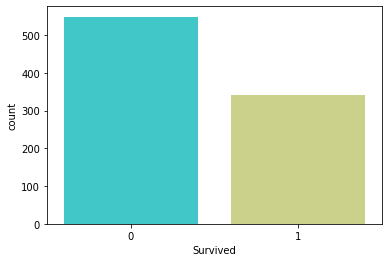

In [4]:
sns.countplot(data=df,x="Survived",palette="rainbow")

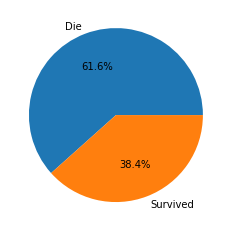

In [7]:
plt.pie(df["Survived"].value_counts(), labels=["Die","Survived"],autopct="%1.1f%%")
plt.show()

In [8]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot: xlabel='Sex', ylabel='count'>

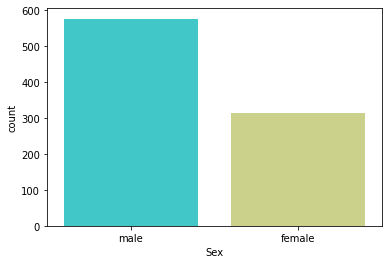

In [9]:
sns.countplot(data=df,x="Sex",palette="rainbow")

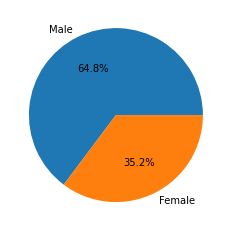

In [10]:
plt.pie(df["Sex"].value_counts(), labels=["Male","Female"],autopct="%1.1f%%")
plt.show()

<AxesSubplot: xlabel='Survived', ylabel='count'>

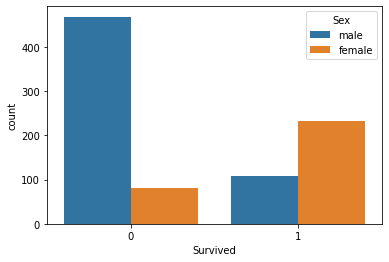

In [11]:
sns.countplot(data=df,x='Survived',hue="Sex")

In [12]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot: xlabel='Survived', ylabel='count'>

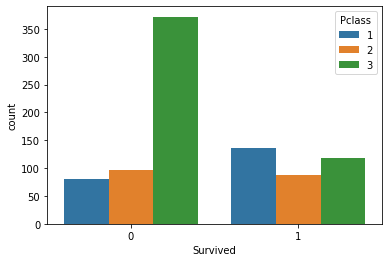

In [13]:
sns.countplot(data=df,x="Survived",hue="Pclass")

<AxesSubplot: xlabel='Sex', ylabel='count'>

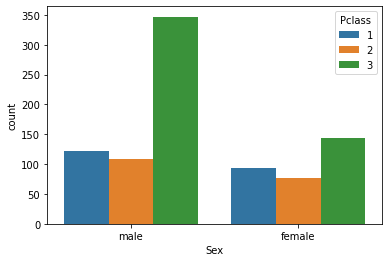

In [14]:
sns.countplot(data=df,x="Sex",hue="Pclass")

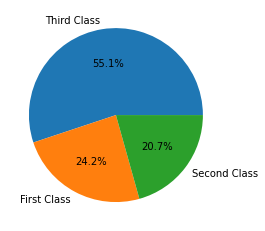

In [15]:
plt.pie(df["Pclass"].value_counts(), labels=["Third Class","First Class","Second Class"],autopct="%1.1f%%")
plt.show()


In [16]:
df["SibSp"].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [17]:
df["Parch"].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


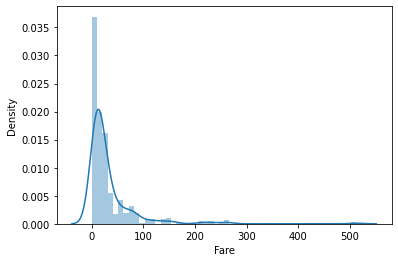

In [19]:
sns.distplot(df["Fare"])
plt.show()

<AxesSubplot: >

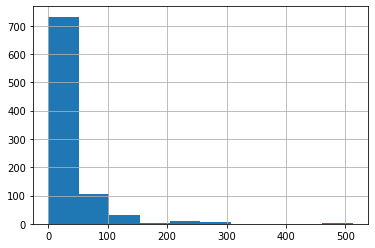

In [20]:
df["Fare"].hist()

<AxesSubplot: xlabel='Age', ylabel='Density'>

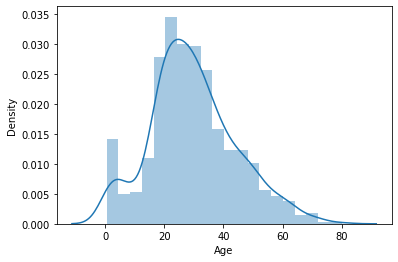

In [21]:
sns.distplot(df["Age"])

array([[<AxesSubplot: title={'center': 'PassengerId'}>,
        <AxesSubplot: title={'center': 'Survived'}>,
        <AxesSubplot: title={'center': 'Pclass'}>],
       [<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'SibSp'}>,
        <AxesSubplot: title={'center': 'Parch'}>],
       [<AxesSubplot: title={'center': 'Fare'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

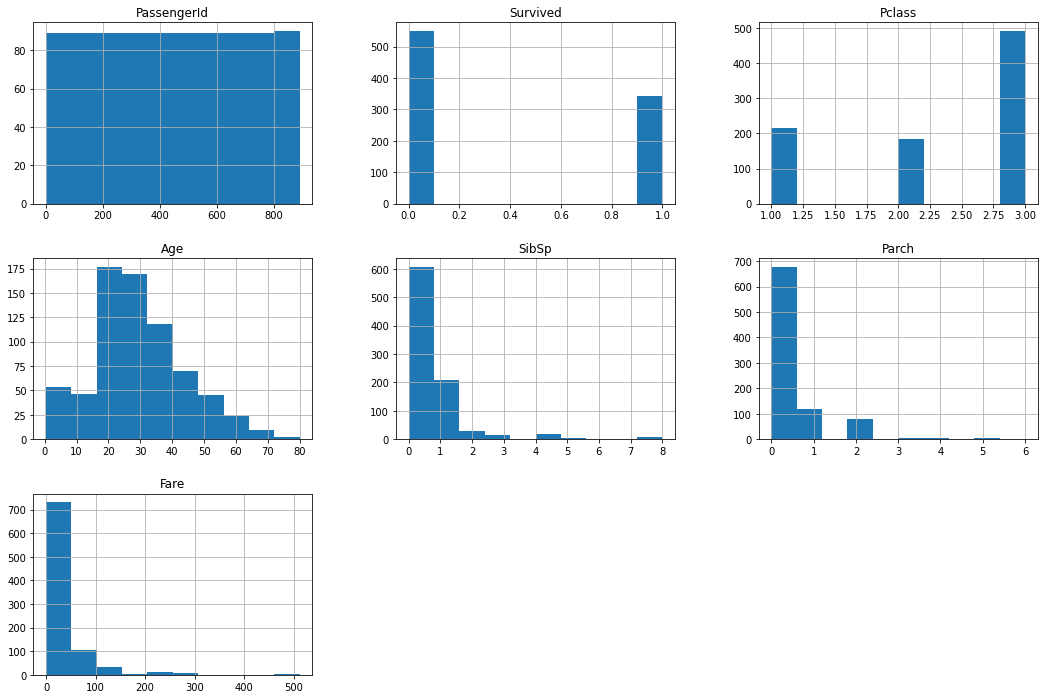

In [22]:
df.hist(figsize=(18,12))

In [23]:
#sns.pairplot(df)

In [24]:
#sns.pairplot(df,hue="Survived")

<AxesSubplot: >

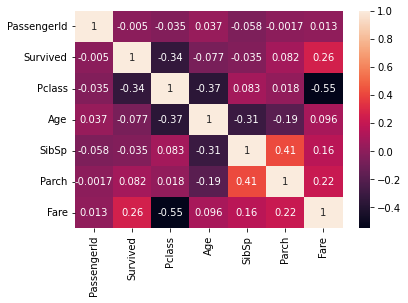

In [25]:
sns.heatmap(df.corr(),annot=True)

# Data Clean

In [26]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot: >

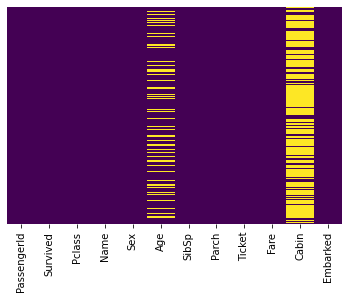

In [27]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

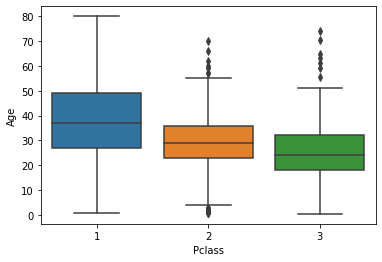

In [28]:
sns.boxplot(x='Pclass',y="Age",data=df)

In [29]:
def fillage(cols):
    age=cols[0]
    pclass=cols[1]
    
    if (pd.isnull(age)):
        if pclass==1:
            return 38
        elif pclass==2:
            return 30
        else:
            return 27
    else:
        return age

In [30]:
df["Age"]=df[["Age","Pclass"]].apply(fillage,axis=1)

<AxesSubplot: >

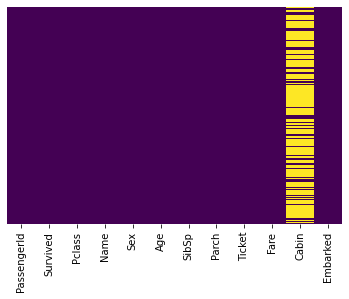

In [31]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [32]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [33]:
df.drop("Cabin",axis=1,inplace=True)

<AxesSubplot: >

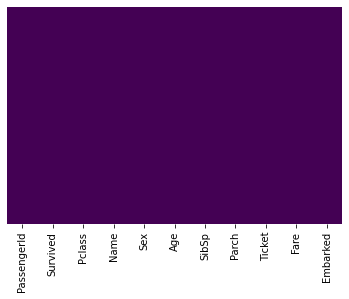

In [34]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [35]:
df.dropna(inplace=True)

In [36]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [39]:
df.drop(["PassengerId","Name","Ticket"],axis=1,inplace=True)

In [40]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# Saperation of X and Y

In [41]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [42]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,27.0,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [43]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [44]:
x.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [45]:
x.Sex.value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [46]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

x[["Sex","Embarked"]] = oe.fit_transform(x[["Sex","Embarked"]])

In [47]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,22.0,1,0,7.2500,2.0
1,1,0.0,38.0,1,0,71.2833,0.0
2,3,0.0,26.0,0,0,7.9250,2.0
3,1,0.0,35.0,1,0,53.1000,2.0
4,3,1.0,35.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...
886,2,1.0,27.0,0,0,13.0000,2.0
887,1,0.0,19.0,0,0,30.0000,2.0
888,3,0.0,27.0,1,2,23.4500,2.0
889,1,1.0,26.0,0,0,30.0000,0.0


In [48]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1,stratify=y)

# Model Building

In [49]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(xtrain,ytrain)

ypred = logreg.predict(xtest)

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

ac = accuracy_score(ytest,ypred)

cm = confusion_matrix(ytest,ypred)

cf = classification_report(ytest,ypred)

print(f"Accuracy :- {ac}\n {cm}\n {cf}")

Accuracy :- 0.8052434456928839
 [[141  24]
 [ 28  74]]
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       165
           1       0.76      0.73      0.74       102

    accuracy                           0.81       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.80      0.81      0.80       267



In [51]:
81/103

0.7864077669902912

In [52]:
train = logreg.score(xtrain,ytrain)
test = logreg.score(xtest,ytest)

print(f"Training Accuracy :- {train}\n Testing Accuracy :- {test}")

Training Accuracy :- 0.8054662379421221
 Testing Accuracy :- 0.8052434456928839


# Forecast New Observation

In [53]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1.0,22.0,1,0,7.2500,2.0
1,1,0.0,38.0,1,0,71.2833,0.0
2,3,0.0,26.0,0,0,7.9250,2.0
3,1,0.0,35.0,1,0,53.1000,2.0
4,3,1.0,35.0,0,0,8.0500,2.0


In [54]:
oe

OrdinalEncoder()

In [55]:
oe.categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [56]:
s = "female"
e = "S"

oe.transform([[s,e]])

array([[0., 2.]])

In [57]:
pclass = 1
sex = "female"
age = 23
sibsp = 0
parch = 1
fare = 31
embarked = "S"

newob = [pclass,sex,age,sibsp,parch,fare,embarked]
newob[1]
newob[-1]

'S'

In [58]:
oe.transform([[newob[1],newob[-1]]])

array([[0., 2.]])

In [59]:
newob[1],newob[-1]=oe.transform([[newob[1],newob[-1]]])[0]
newob

[1, 0.0, 23, 0, 1, 31, 2.0]

In [60]:
logreg.predict([newob])

array([1], dtype=int64)

In [61]:
def predictsurvived():
    pclass = int(input("Enter Passenger Class:- "))
    sex = input("Enter Gender Of a Passeneger:- ")
    age = int(input("Enter Age of The Passenger :- "))
    sibsp = int(input("Enter No of SibSp Of Passenger:- "))
    parch = int(input("Enter No Of Parch of Passenegr:- "))
    fare = float(input("Enter Ticket Fare:- "))
    embarked = input("Enter Port Embarkation :- ")
    
    newob = [pclass,sex,age,sibsp,parch,fare,embarked]
    newob[1],newob[-1]=oe.transform([[newob[1],newob[-1]]])[0]
    v = logreg.predict([newob])[0]
    
    if v==1:
        print("Yes, With the Given Features the Passeneger Will Survived...!!!!")
    else:
        print("No, With the Given Features the Passeneger Will Not Survived...!!!!")
        
    return v

In [64]:
predictsurvived()

Enter Passenger Class:- 1
Enter Gender Of a Passeneger:- male
Enter Age of The Passenger :- 21
Enter No of SibSp Of Passenger:- 0
Enter No Of Parch of Passenegr:- 0
Enter Ticket Fare:- 0.15
Enter Port Embarkation :- Q
Yes, With the Given Features the Passeneger Will Survived...!!!!


1

In [69]:
sur_count=df.groupby(["Embarked","Survived"]).size()
sur_count

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64

In [70]:
sur_count=df.groupby(["Pclass","Survived"]).size()
sur_count

Pclass  Survived
1       0            80
        1           134
2       0            97
        1            87
3       0           372
        1           119
dtype: int64